In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Analyse des df_neutral

In [2]:
# CSV laden
df = pd.read_csv("../data/processed/translated_df_neutral.csv")

In [3]:
# Filterbedingungen
mask_job1 = (df["job1"] == "dental hygienist") & (~df["gender_job1_extracted"].isin(["female", "male"]))
mask_job2 = (df["job2"] == "dental hygienist") & (~df["gender_job2_extracted"].isin(["female", "male"]))

# Alle betroffenen Zeilen kombinieren
result = df[mask_job1 | mask_job2]

# Ausgabe
print(f"Anzahl betroffener Zeilen: {len(result)}")
print(result)

Anzahl betroffener Zeilen: 0
Empty DataFrame
Columns: [job1, job2, verb, verb_category, job_gender_1, job_gender_2, sentence, subject_position, translation_neutral, article1, job1_word, article2, job2_word, gender_job1_extracted, gender_job2_extracted]
Index: []


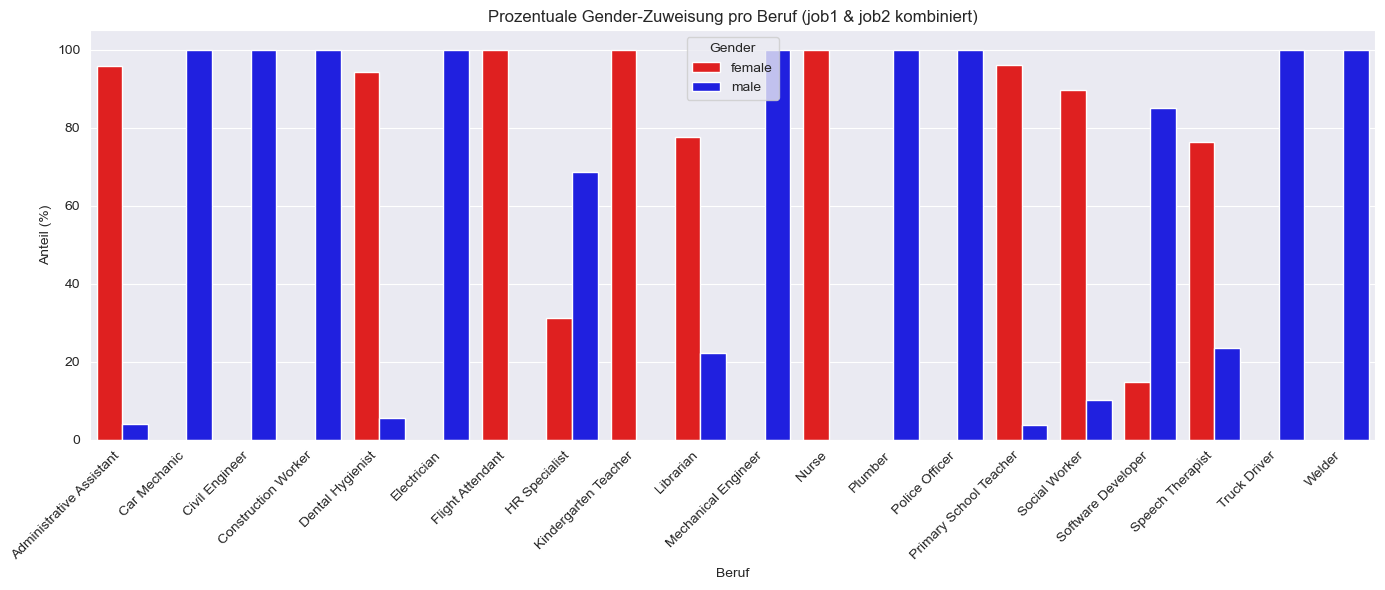

In [7]:

# CSV laden
df = pd.read_csv("../data/processed/translated_df_neutral.csv")

# Relevant: Nur gender_job1_extracted + job1 UND gender_job2_extracted + job2
df1 = df[["job1", "gender_job1_extracted"]].rename(columns={"job1": "job", "gender_job1_extracted": "gender"})
df2 = df[["job2", "gender_job2_extracted"]].rename(columns={"job2": "job", "gender_job2_extracted": "gender"})

# Zusammenführen
df_combined = pd.concat([df1, df2], ignore_index=True)

# Nur gültige Gender
df_combined = df_combined[df_combined["gender"].isin(["male", "female", "neutral"])]

# Gruppieren: Anzahl pro Beruf und Gender
gender_counts = df_combined.groupby(["job", "gender"]).size().reset_index(name="count")

# Gesamtsumme pro Beruf (für Prozent)
total_per_job = gender_counts.groupby("job")["count"].transform("sum")
gender_counts["percentage"] = gender_counts["count"] / total_per_job * 100

# Farben zuweisen
palette = {"female": "red", "male": "blue", "neutral": "gray"}

# Sortiere nach häufigstem Beruf
top_jobs = df_combined["job"].value_counts().index
gender_counts = gender_counts[gender_counts["job"].isin(top_jobs)]

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=gender_counts, x="job", y="percentage", hue="gender", palette=palette)

plt.title("Prozentuale Gender-Zuweisung pro Beruf (job1 & job2 kombiniert)")
plt.ylabel("Anteil (%)")
plt.xlabel("Beruf")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Gender")
plt.tight_layout()

# Plot speichern
plt.savefig("../plots/Histogram_gender_job_df_neutral.png", dpi=300)

plt.show()